Summary Statistics:
            User ID Gender          Age Activity Level Location  App Sessions  \
count   5000.000000   5000  5000.000000           5000     5000   5000.000000   
unique          NaN      2          NaN              3        3           NaN   
top             NaN   Male          NaN       Moderate    Rural           NaN   
freq            NaN   2538          NaN           1734     1684           NaN   
mean    2500.500000    NaN    38.423600            NaN      NaN    124.366400   
std     1443.520003    NaN    12.160631            NaN      NaN     42.689317   
min        1.000000    NaN    18.000000            NaN      NaN     50.000000   
25%     1250.750000    NaN    28.000000            NaN      NaN     89.000000   
50%     2500.500000    NaN    39.000000            NaN      NaN    124.000000   
75%     3750.250000    NaN    49.000000            NaN      NaN    161.000000   
max     5000.000000    NaN    59.000000            NaN      NaN    199.000000   

       

/Users/butch/MSE/anaconda/anaconda3/envs/dataAnalytics/lib/python3.10/site-packages/seaborn/axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


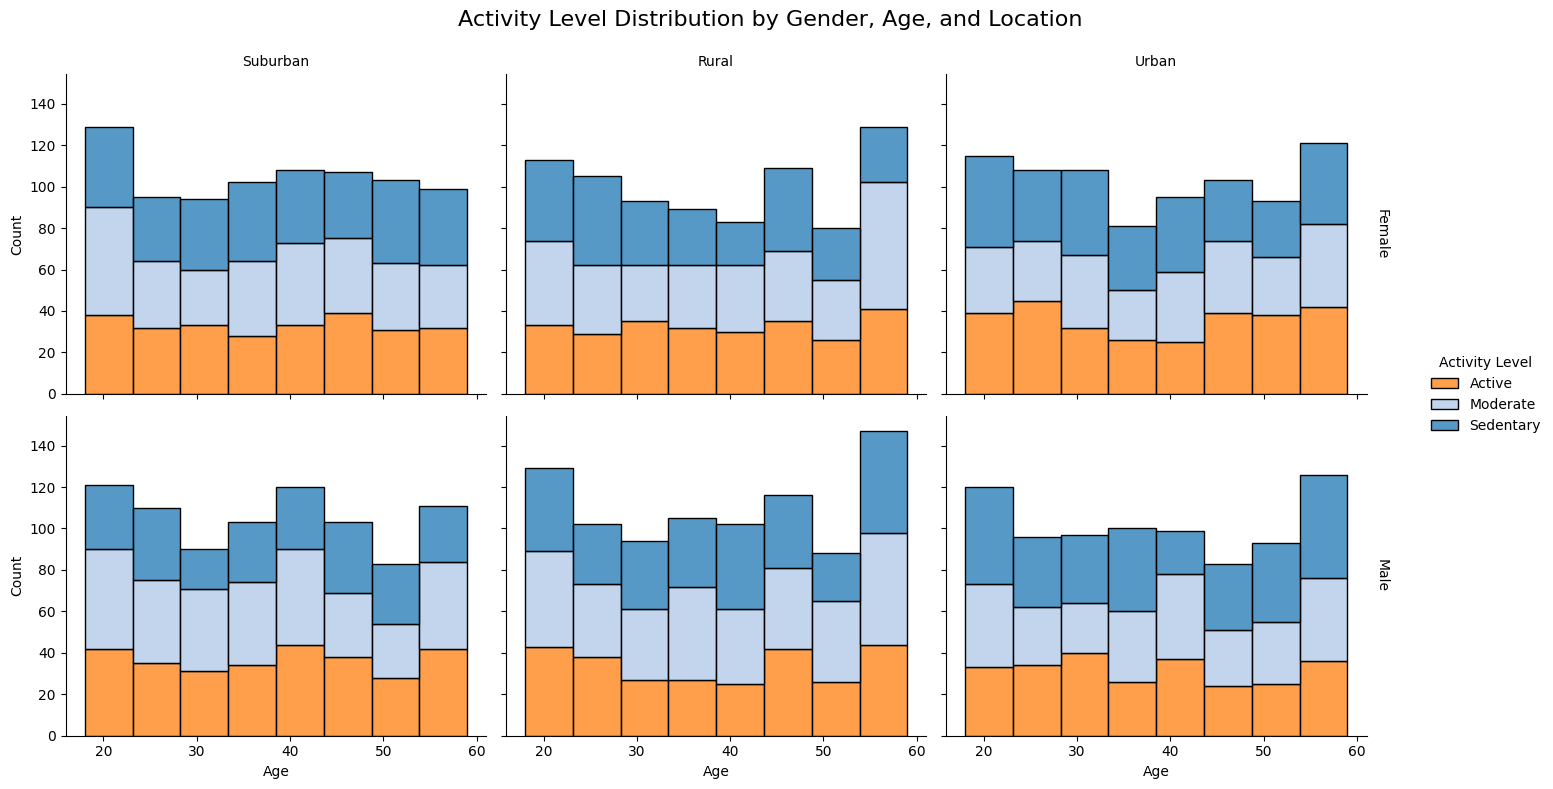

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = pd.read_csv('Task2 Dataset.csv')

# Demographic Distribution Analysis
# Basic summary
summary = data.describe(include='all')

# Gender distribution
gender_dist = data['Gender'].value_counts()

# Location distribution
location_dist = data['Location'].value_counts()

# Activity Level distribution
activity_dist = data['Activity Level'].value_counts()

# Output the basic summaries
print("Summary Statistics:")
print(summary)
print("\nGender Distribution:")
print(gender_dist)
print("\nLocation Distribution:")
print(location_dist)
print("\nActivity Level Distribution:")
print(activity_dist)

# Cultural Relevance in User Behavior
# Gender and Activity Level
gender_activity = pd.crosstab(data['Gender'], data['Activity Level'])

# Age and Activity Level
age_activity = data.groupby('Age')['Activity Level'].value_counts().unstack().fillna(0)

# Location and Activity Level
location_activity = pd.crosstab(data['Location'], data['Activity Level'])

# Output the cross-tabulations
print("\nGender and Activity Level:")
print(gender_activity)
print("\nAge and Activity Level:")
print(age_activity)
print("\nLocation and Activity Level:")
print(location_activity)

# Define the FacetGrid
g = sns.FacetGrid(data, col="Location", row="Gender", margin_titles=True, height=4, aspect=1.2)

# Custom plotting function to handle hue within histplot
def histplot_with_hue(data, **kwargs):
    sns.histplot(data=data, x="Age", hue="Activity Level", multiple="stack", palette="tab20", binwidth=5, hue_order=["Active", "Moderate", "Sedentary"], **kwargs)

# Map the custom function to the FacetGrid
g.map_dataframe(histplot_with_hue)

# Add legend and titles
g.add_legend(title="Activity Level", labels=["Active", "Moderate", "Sedentary"])
g.set_axis_labels("Age", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Activity Level Distribution by Gender, Age, and Location", fontsize=16)

# Display the plot
plt.show()
